In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression

## Exploratory Data Analysis

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

![](images/microchip.png)

In [4]:
path = "data\ex2data2.txt"
data = pd.read_csv(path, names=["test1", "test2", "result"], header=None)

In [5]:
data.describe()

,test1,test2,result
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


### Plotting

In [10]:
groups = data.groupby(['result'])

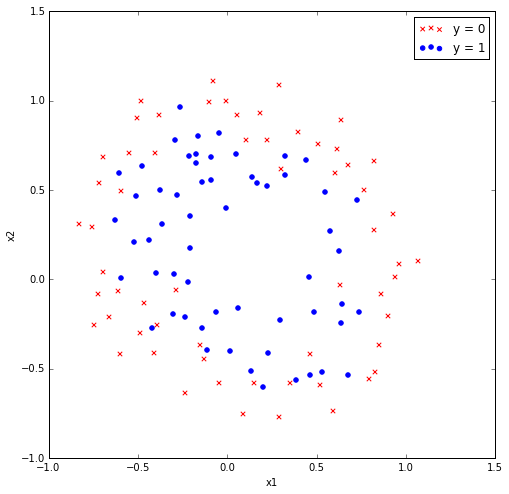

In [188]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(groups.get_group(0).test1, groups.get_group(0).test2, marker='x', color="red")
ax.scatter(groups.get_group(1).test1, groups.get_group(1).test2, marker='o', color="blue")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(("y = 0", "y = 1"))

## Regularized Logistic Regression

### Create map_feature

In [72]:
X = data.as_matrix()[:, 0:2]
Y = data.as_matrix()[:, 2]
def map_feature(X1, X2):
    degree = 6
    out = np.ones(shape=(X1.shape[0], 1))
    for i in range(1,degree+1):
        for j in range(i+1):
            p = np.multiply(np.power(X1, (i - j)), np.power(X2, j))
            out = np.concatenate((out, p), 1)
    return out
X = map_feature(X[:, 0:1], X[:, 1:2])

### Fit Data to Logistic Regression Model

In [108]:
clf = LogisticRegression(penalty='l2', C=1)
clf.fit(X[:, 1:], Y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

### Decision Boundary

[Reference: Machine Learning with Python - Logistic Regression](http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html)

In [106]:
def draw_decision_boundary(clf, title="Decision Boundary"):
    N = 50  # number of point
    u = np.linspace(-1, 1.5, N)
    v = np.linspace(-1, 1.5, N)
    L = len(u) # 
    z = np.zeros(shape=(N, N))
    theta = np.concatenate((np.asmatrix(clf.intercept_), clf.coef_), axis=1)
    for i in range(N):
        for j in range(N):
            z[i, j] = theta.dot(map_feature(np.asmatrix(u[i]), np.asmatrix(v[j])).T)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(groups.get_group(0).test1, groups.get_group(0).test2, marker='x', color="red")
    ax.scatter(groups.get_group(1).test1, groups.get_group(1).test2, marker='o', color="blue")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.contour(u,v,z)
    ax.legend(("y = 0", "y = 1"))
    ax.set_title(title)

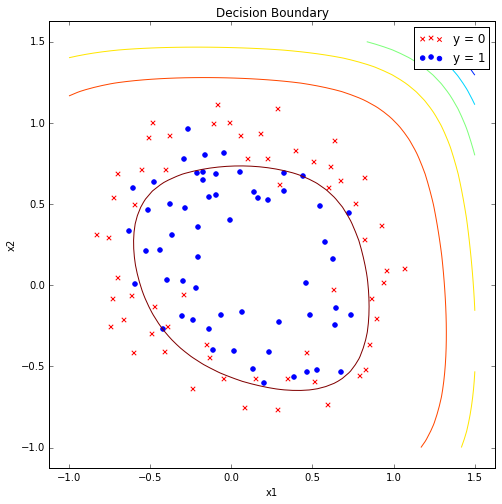

In [107]:
draw_decision_boundary(clf)

#### Logistic Regression with small alpha, large C

It's over fitting

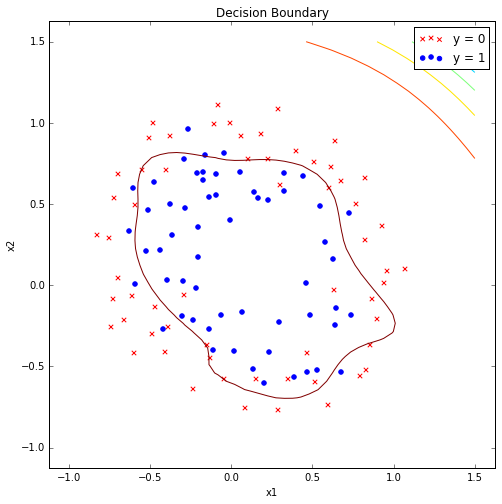

In [120]:
clf = LogisticRegression(penalty='l2', C=1000000)
clf.fit(X[:, 1:], Y)
draw_decision_boundary(clf)

#### Logistic Regression with large alpha, small C

underfitting

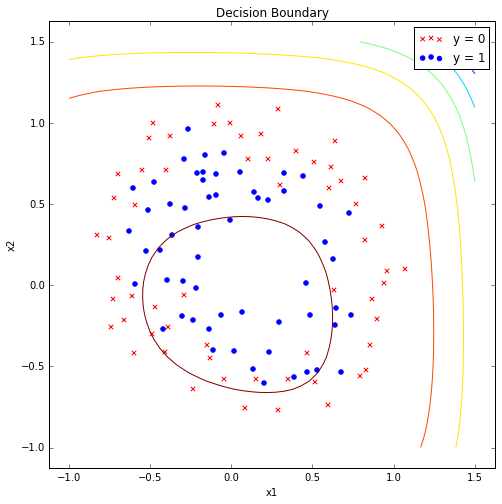

In [123]:
clf = LogisticRegression(penalty='l2', C=0.03)
clf.fit(X[:, 1:], Y)
draw_decision_boundary(clf)